In [ ]:
!pip install Pillow==9.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-9.1.0-cp312-cp312-linux_x86_64.whl size=1189153 sha256=1d474a2c12a942a44f004976aafb38f2eb7ced38979d45cb0152c25ce0734ced
  Stored in directory: /root/.cache/pip/wheels/14/f4/63/763d1fd540d83a7536aedae8f8e9a307674392c118232bb5ac
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtune 0.6.1 requires Pillow>=9.4.0, but you have pillow 9.1.0 which is incompatible.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.1.0 which is incompatible.


# **Part 2**

In [ ]:
!pip uninstall tflearn
!pip install git+https://github.com/tflearn/tflearn.git

import sys, tensorflow as tf
print("Python", sys.version)
print("TensorFlow", tf.__version__)


Found existing installation: tflearn 0.5.0
Uninstalling tflearn-0.5.0:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/tflearn-0.5.0.dist-info/*
    /usr/local/lib/python3.12/dist-packages/tflearn/*
Proceed (Y/n)? Y
  Successfully uninstalled tflearn-0.5.0
  Cloning https://github.com/tflearn/tflearn.git to /tmp/pip-req-build-ldhzeefs
  Running command git clone --filter=blob:none --quiet https://github.com/tflearn/tflearn.git /tmp/pip-req-build-ldhzeefs
  Resolved https://github.com/tflearn/tflearn.git to commit db5176773299b67a2a75c5889fb2aba7fd0fea8a
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130653 sha256=198d5a0015c4535fb671d6410a9240542075a4a3f5f9fefcae31a8d73513a833
  Stored in directory: /tmp/pip-ephem-wheel-cache-hiypv6nj/wheels/46/1a/54/47bfea010cc39207ecb12796f18f84f3508f5ca971c7718e50
Successfully built tflearn
Python 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
TensorFlow 2.19.0


In [ ]:
# Run this cell before importing tflearn
try:
    import tensorflow.python.util.nest as nest
except Exception:
    nest = None

if nest is not None and not hasattr(nest, 'is_sequence'):
    from collections.abc import Sequence
    def _is_sequence(x):
        return isinstance(x, Sequence) and not isinstance(x, (str, bytes))
    nest.is_sequence = _is_sequence

# Now import tflearn
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
help(oxflower17)

Help on module tflearn.datasets.oxflower17 in tflearn.datasets:

NAME
    tflearn.datasets.oxflower17 - 17 Category Flower Dataset

DESCRIPTION
    Credits: Maria-Elena Nilsback and Andrew Zisserman.
    http://www.robots.ox.ac.uk/~vgg/data/flowers/17/

FUNCTIONS
    build_class_directories(dir)

    load_data(dirname='17flowers', resize_pics=(224, 224), shuffle=True, one_hot=False)

    maybe_download(filename, source_url, work_directory)

    reporthook(blocknum, blocksize, totalsize)
        #reporthook from stackoverflow #13881092

    untar(fname, extract_dir)

FILE
    /usr/local/lib/python3.12/dist-packages/tflearn/datasets/oxflower17.py




In [ ]:
# Get predictor and Target split

x, y = oxflower17.load_data()  # Method 1: Target column as is

In [ ]:
# Get total number of images

import numpy as np
print(' Total number of images : ', x.shape[0])
# Get the shape and size of each image

print(' Image shape : ', x.shape[1:3])
# Get the number of channels of each image

print(' Channel : ', x.shape[3])

# Print the image count, shape and channel in one array

print(' Image as 4d array : ', x.shape)

# Get target classes of the images

print(' Target class count : ', y.shape)

# Get total number of unique target classes of the images

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

 Total number of images :  1360
 Image shape :  (224, 224)
 Channel :  3
 Image as 4d array :  (1360, 224, 224, 3)
 Target class count :  (1360,)
Total number of outputs :  17
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
# Target on hot coding ( Score: 2 points )

from keras.utils import to_categorical # Library

Y_one_hot = to_categorical(y)
Y_one_hot.shape

(1360, 17)

In [ ]:
# Split the data into train, validation and test


from sklearn.model_selection import train_test_split
t_X,test_X,t_Y,test_Y = train_test_split(x, Y_one_hot, test_size=0.2, random_state=5)

# Test Train split
from sklearn.model_selection import train_test_split
train_X,valid_X,train_Y,valid_Y = train_test_split(t_X, t_Y, test_size=0.2, random_state=5)

In [ ]:
# Convert all images to float 32 format

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
valid_X = valid_X.astype('float32')
# Normalise all images

train_X = train_X / 255.
test_X = test_X / 255.
valid_X = valid_X / 255.

# Print final shape and size of Train, validation and test data

print(' Train data : ', t_X.shape, t_Y.shape)

print(' Train data : ', train_X.shape, train_Y.shape)

print(' Validation data : ', valid_X.shape, valid_Y.shape)

print(' Test data : ', test_X.shape, test_Y.shape)

 Train data :  (1088, 224, 224, 3) (1088, 17)
 Train data :  (870, 224, 224, 3) (870, 17)
 Validation data :  (218, 224, 224, 3) (218, 17)
 Test data :  (272, 224, 224, 3) (272, 17)


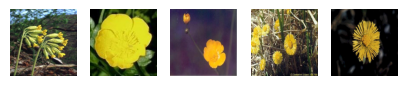

label for each of the above image: [ 5  6  6  3  3  2  4 16  2 16]


In [ ]:
# Display the first 5 images in the dataset and their labels

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 1))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y[0:10]))

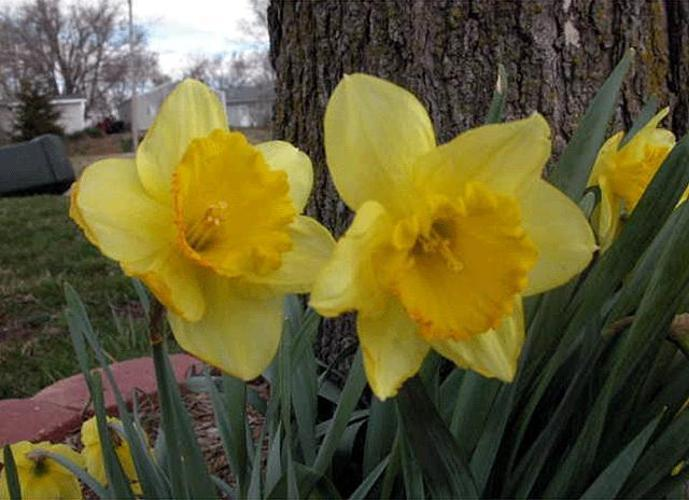

Image filename: image_0001.jpg
Image width: 689
Image height: 500
Image mode: RGB
Image format: JPEG


In [ ]:
# Display the first image from class = 0

from PIL import Image
import os

path = '/content/17flowers/jpg/0/image_0001.jpg'

if not os.path.exists(path):
    raise FileNotFoundError(f"File not found: {path}")

with Image.open(path) as img:
    width, height = img.size
    display(img)
    filename = os.path.basename(img.filename)  # image filename
    mode = img.mode
    fmt = img.format

print("Image filename:", filename)
print("Image width:", width)
print("Image height:", height)
print("Image mode:", mode)
print("Image format:", fmt)



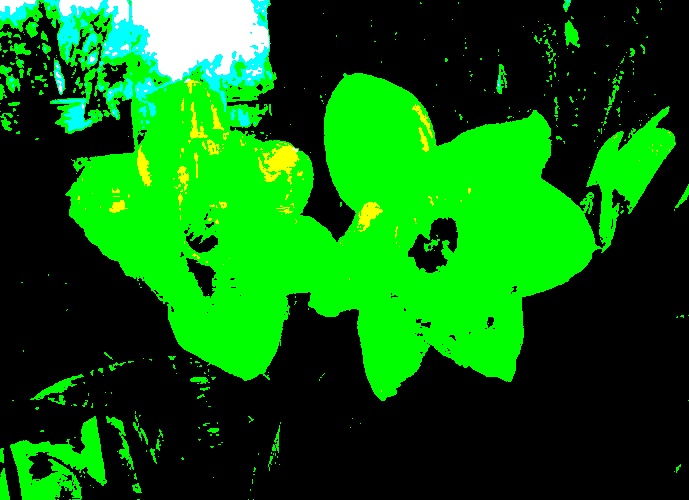

In [ ]:
def convert_grayscale(image):
    """
    Apply per-channel thresholding to produce a colorized image.
    `image` can be a PIL.Image object.
    Returns a new PIL.Image in RGB mode.
    """
    # Ensure image is a PIL Image and in RGB mode
    if not isinstance(image, Image.Image):
        raise TypeError("image must be a PIL.Image.Image")
    img = image.convert('RGB')

    width, height = img.size
    new = Image.new('RGB', (width, height))
    pixels_new = new.load()
    pixels_src = img.load()

    for i in range(width):
        for j in range(height):
            red, green, blue = pixels_src[i, j]

            # Apply thresholds (your original logic)
            red = 255 if red > 200 else 0
            green = 255 if green > 100 else 0
            blue = 255 if blue > 150 else 0

            pixels_new[i, j] = (red, green, blue)

    return new

# Example usage: open file, convert, and save/display
path = '/content/17flowers/jpg/0/image_0001.jpg'
if not os.path.exists(path):
    raise FileNotFoundError(f"File not found: {path}")

with Image.open(path) as original:
    new_img = convert_grayscale(original)
    # Save or display
    new_img.save('/content/converted_image.png')
    display(new_img)


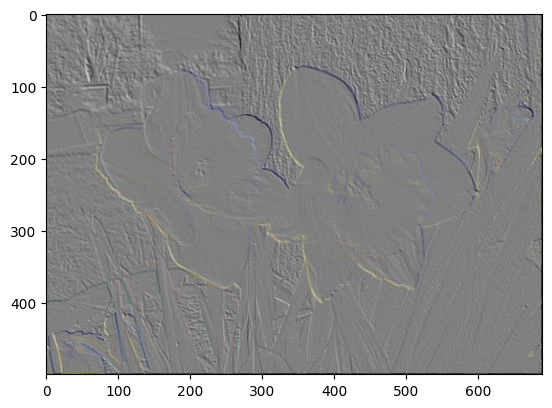

In [ ]:
  # Apply the edge detection or Blur or Emboss filter on the image


#Import required image modules
from PIL import Image, ImageFilter

#Import all the enhancement filter from pillow
from PIL.ImageFilter import ( BLUR,
                             CONTOUR,
                             DETAIL,
                             EDGE_ENHANCE,
                             EDGE_ENHANCE_MORE,
                             EMBOSS,
                             FIND_EDGES,
                             SMOOTH,
                             SMOOTH_MORE,
                             SHARPEN )
#Create image object
img = Image.open(path)
#Applying the blur filter
img1 = img.filter(EMBOSS)
img2 = img.filter(SHARPEN)
img3 = img.filter(DETAIL)
img4 = img.filter(SMOOTH)
plt.imshow(img1)
plt.show()

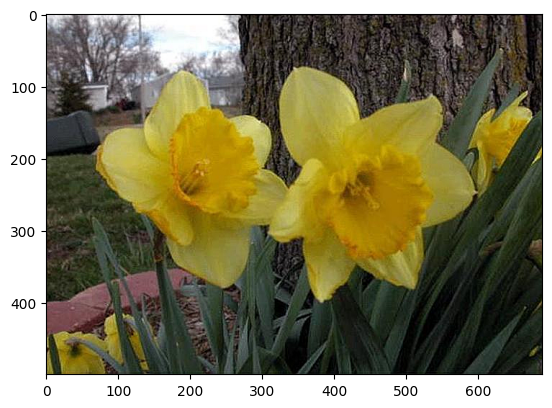

In [ ]:
plt.imshow(img2)
plt.show()

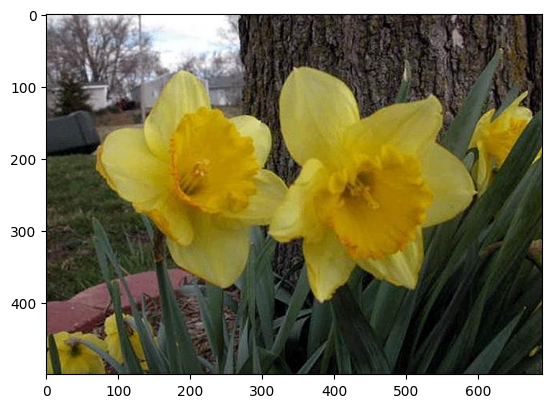

In [ ]:
plt.imshow(img3)
plt.show()

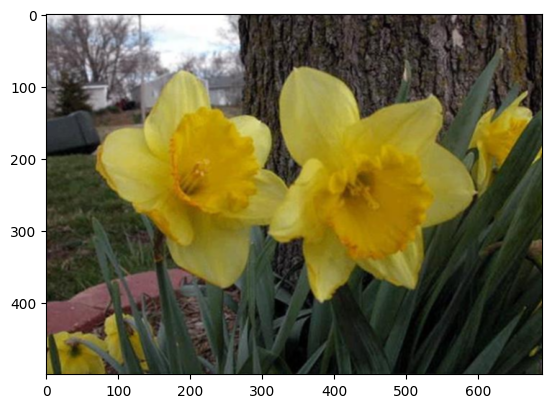

In [ ]:
plt.imshow(img4)
plt.show()

In [ ]:
# Use ML technique to build a classifier


# Preprocess the data - Split the data into train, validation and test


from sklearn.model_selection import train_test_split
ML_TRAIN_X,ML_TEST_X,ML_TRAIN_Y,ML_TEST_Y = train_test_split(x, y, test_size=0.2, random_state=5)

# Test Train split
from sklearn.model_selection import train_test_split
ML_Train_X,ML_Valid_X,ML_Train_Y,ML_Valid_Y = train_test_split(ML_TRAIN_X, ML_TRAIN_Y, test_size=0.2, random_state=5)


# Flatten the images data

# Training data
x_train_ML = []
for i in range(870):
    x_train_ML.append(ML_Train_X[i,:].flatten())

# Testing data
x_test_ML = []
for i in range(218):
    x_test_ML.append(ML_Valid_X[i,:].flatten())


# Print data lengths

print("\n Training data:",len(x_train_ML))
print("\n Training Target data:",len(ML_Train_Y))
print("\n Testing data:",len(x_test_ML))
print("\n Testing Target data:",len(ML_Valid_Y))


# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)
model_RF.fit(x_train_ML, ML_Train_Y)

# Accuracy
pred_RF = model_RF.predict(x_test_ML)
RF_Train = model_RF.score(x_train_ML, ML_Train_Y)
RF_Test = accuracy_score(ML_Valid_Y, pred_RF)

# Output
print("\nRandom Forest: Train Accuracy:",RF_Train)
print("\nRandom Forest: Test Accuracy:",RF_Test)



 Training data: 870

 Training Target data: 870

 Testing data: 218

 Testing Target data: 218

Random Forest: Train Accuracy: 1.0

Random Forest: Test Accuracy: 0.4541284403669725


In [ ]:

import os
import pandas as pd
import numpy as np
import cv2
#from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Changing the Target parameter as per the requirement of the NN model
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Reshaping the train and test data and normalizing train data

X_train = X_train.astype('float32')
X_train_ML = X_train.reshape(X_train.shape[0], 150528) # 224X224X3 = 150528
X_train_ML = X_train_ML/255

X_test = X_test.astype('float32')
X_test_ML = X_test.reshape(X_test.shape[0], 150528) # 224X224X3 = 150528
X_test_ML = X_test_ML/255


from sklearn.svm import SVC

import tensorflow
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Convolution2D, Flatten, MaxPooling2D

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tensorflow.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y))   # compute from full label set
y_train_NN = to_categorical(y_train, num_classes=num_classes)
y_test_NN  = to_categorical(y_test,  num_classes=num_classes)


In [ ]:

# Changing the Target parameter as per the requirement of the NN model

# One-Hot encoded outputs

y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [ ]:
y_train_NN = pd.get_dummies(y_train).values.astype('float32')
y_test_NN  = pd.get_dummies(y_test).values.astype('float32')


In [ ]:
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((X_train_ML, y_train_NN)).batch(8)
#X_train_ML= tf.data.Dataset.from_tensor_slices((X_train_ML)).batch(8)
#y_train_NN= tf.data.Dataset.from_tensor_slices((y_train_NN)).batch(8)
#X_test_ML= tf.data.Dataset.from_tensor_slices((X_test_ML)).batch(8)
#y_test_NN= tf.data.Dataset.from_tensor_slices((y_test_NN)).batch(8)
val_ds   = tf.data.Dataset.from_tensor_slices((X_test_ML, y_test_NN)).batch(8)

In [ ]:
#Deep Neural Network Model

backend.clear_session()

random.seed(42)
tensorflow.random.set_seed(42)

model = Sequential()
model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer

model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='softmax'))
#model.add(Dense(num_classes, activation='softmax'))


# Compile model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=["accuracy"]) ### Loss function = Categorical cross entropy

# Fit the model
#hist = model.fit( train_ds, validation_data=val_ds, epochs=25, batch_size=8, verbose=1)
# Fit the model


In [ ]:
y_train_NN = pd.get_dummies(y_train).values.astype('float32')
y_test_NN  = pd.get_dummies(y_test).values.astype('float32')

from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y))  # total number of classes
y_train_NN = to_categorical(y_train, num_classes=num_classes)
y_test_NN  = to_categorical(y_test,  num_classes=num_classes)


import tensorflow as tf

batch_size = 8
train_ds = tf.data.Dataset.from_tensor_slices((X_train_ML, y_train_NN)).batch(batch_size)
val_ds   = tf.data.Dataset.from_tensor_slices((X_test_ML, y_test_NN)).batch(batch_size)

hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    verbose=1
)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'SymbolicTensor'

In [ ]:
# Accuracy and Loss plots for Test & Train Data

epochs = range(len(hist.history['accuracy'])) # Get number of epochs
model.test_accuracy = model.evaluate(X_test_ML, y_test_NN, verbose = 1)

plt.subplot(2,1,1)
plt.plot(epochs, hist.history['val_accuracy'], label = 'validation accuracy')
plt.plot(epochs, hist.history['accuracy'], label = 'Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Epochs Vs Accuracy (Test Accuracy = '+str(model.test_accuracy[1])+')')
plt.legend(loc = 'lower right')
plt.figure()

plt.subplot(2,1,2)
plt.plot(epochs, hist.history['val_loss'], label = 'validation loss')
plt.plot(epochs, hist.history['loss'], label = 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.title('Epochs Vs Loss (Test Accuracy = '+str(model.test_accuracy[1])+')')

NameError: name 'hist' is not defined

In [ ]:
# Predicted Data
y_pred = model.predict(X_test_ML)

# Find out the predictions classes with maximum probability
y_pred = np.argmax(y_pred, axis=1)

# Confusion Matrix for Deep Neural Network Model
print(f'Confusion Matrix for Deep Neural Network Model :\n\n {confusion_matrix(y_test, y_pred)}\n\n\n')

#  Classification Report for Deep Neural Network Model

print(f'Classification Report for Deep Neural Network Model :\n\n {classification_report(y_test, y_pred)}')

In [ ]:

# Predicted Data
y_pred = model.predict(X_test_ML)

# Find out the predictions classes with maximum probability
y_pred = np.argmax(y_pred, axis=1)

# Confusion Matrix for Deep Neural Network Model
print(f'Confusion Matrix for Deep Neural Network Model :\n\n {confusion_matrix(y_test, y_pred)}\n\n\n')

#  Classification Report for Deep Neural Network Model
print(f'Classification Report for Deep Neural Network Model :\n\n {classification_report(y_test, y_pred)}')

In [ ]:
# Reshaping Train & Test Data & Normalizing Train data

X_train_CNN = X_train.reshape(X_train.shape[0], 224, 224, 3) # 224X224X3
X_train_CNN = X_train_ML/255

X_test_CNN = X_test.reshape(X_test.shape[0], 224, 224, 3) # 224X224X3
X_test_CNN = X_test_ML/255

In [ ]:
# CNN Model Architecture Building

backend.clear_session()

random.seed(42)
tensorflow.random.set_seed(42)

model_cn = Sequential()

model_cn.add(BatchNormalization(input_shape = (224, 224, 3)))

model_cn.add(Convolution2D(filters = 64, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3)))
model_cn.add(MaxPooling2D(pool_size = 2))


model_cn.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cn.add(MaxPooling2D(pool_size = 2))

model_cn.add(Convolution2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cn.add(MaxPooling2D(pool_size = 2))

model_cn.add(Flatten())

# fully connected layer
model_cn.add(Dense(units = 64,activation = 'relu'))
model_cn.add(Dense(units = 32,activation = 'relu'))

# Classification layer
model_cn.add(Dense(units = 17, activation = 'softmax'))

In [ ]:
model_cn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting CNN Model on Train Data

MODEL_CN = model_cn.fit(X_train_CNN, y_train_NN, epochs = 15, validation_data = (X_test_CNN, y_test_NN), initial_epoch=0)

Epoch 1/15


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [ ]:
print(X_train_CNN.shape, X_test_CNN.shape)

(1088, 150528) (272, 150528)


In [ ]:
# Accuracy and Loss plots for Test & Train Data

epochs = range(len(MODEL_CN.history['acc'])) # Get number of epochs
model_cn.test_accuracy = model_cn.evaluate(X_test_CN, y_test_NN, verbose = 1)

plt.subplot(2,1,1)
plt.plot(epochs, MODEL_CN.history['val_acc'], label = 'validation accuracy')
plt.plot(epochs, MODEL_CN.history['acc'], label = 'Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Epochs Vs Accuracy (Test Accuracy = '+str(model_cn.test_accuracy[1])+')')
plt.legend(loc = 'lower right')
plt.figure()

plt.subplot(2,1,2)
plt.plot(epochs, MODEL_CN.history['val_loss'], label = 'validation loss')
plt.plot(epochs, MODEL_CN.history['loss'], label = 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.title('Epochs Vs Loss (Test Accuracy = '+str(model_cn.test_accuracy[1])+')')

In [ ]:
# Predicted Data
y_pred = model_cn.predict(X_test_CN)

# Find out the predictions classes with maximum probability
y_pred = np.argmax(y_pred, axis=1)

# Confusion Matrix for CNN Model
print(f'CNN Model Confusion Matrix For Testing Dataset:\n\n {confusion_matrix(y_test, y_pred)}\n\n\n')

# Classification Report for CNN Model
print(f'CNN Model Classification Report For Testing Dataset:\n\n {classification_report(y_test, y_pred)}')

In [ ]:
# Test Accuracy much higher with CNN Model hence we predict the Prediction.jpg image with CNN Model though there is overfitting observed

import cv2
test_image = cv2.imread('/content/drive/MyDrive/Prediction.jpg')

# Resize the image to 224 X 224 shape to be compatible with the model
test_image = cv2.resize(test_image,(224,224))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))

#Predict the result of the test image using the best model so far in terms of Test Accuracy - CNN Model
result = model_cn.predict(test_image)

print(result[0])

# Check the indices Image Data Generator has allotted to each folder
classes_array = np.unique(y)
print(classes_array)
#print (type(classes_array))

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print(f'Predicted Class : {classes_array[predicted_index]}')